# O que influencia no sucesso da conversão de uma campanha?
### Vamos descobrir!

## Análise Exploratória dos Dados

In [1]:
# Carregando o dataset
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Traduzindo colunas

In [2]:
df.columns = ['Idade', 'Profissao', 'Estado_civil', 'Educacao', 'Inadimplente',
       'Saldo_medio', 'Emp_imobiliario', 'Emprestimo', 'Tipo_contato', 'Dia',
       'Mes', 'Duracao', 'Contatos_realizados', 'Dias_passados_camp_anterior',
       'Contatos_camp_anterior', 'Resultado_camp_anterior', 'Conversao']

# Verificação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Idade                        45211 non-null  int64 
 1   Profissao                    45211 non-null  object
 2   Estado_civil                 45211 non-null  object
 3   Educacao                     45211 non-null  object
 4   Inadimplente                 45211 non-null  object
 5   Saldo_medio                  45211 non-null  int64 
 6   Emp_imobiliario              45211 non-null  object
 7   Emprestimo                   45211 non-null  object
 8   Tipo_contato                 45211 non-null  object
 9   Dia                          45211 non-null  int64 
 10  Mes                          45211 non-null  object
 11  Duracao                      45211 non-null  int64 
 12  Contatos_realizados          45211 non-null  int64 
 13  Dias_passados_camp_anterior  45

### Verificando correlação das variáveis quantitativas

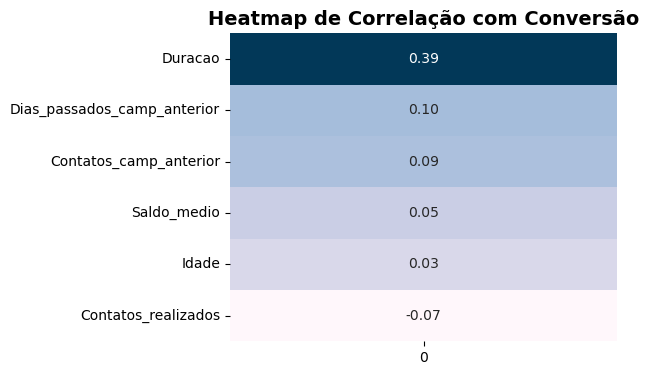

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertendo a variável 'Conversao' para valores binários
df_original = df.copy()
df['Conversao'] = df['Conversao'].map({'yes': 1, 'no': 0})

# Fazendo as correlações
quant = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Conversao'])
correlacao = quant.corrwith(df['Conversao']).sort_values(ascending=False)

# Visualizando as correlações
plt.figure(figsize=(5, 4))
sns.heatmap(correlacao.drop('Dia').to_frame(), annot=True, cmap='PuBu', fmt=".2f", cbar=False)
plt.title('Heatmap de Correlação com Conversão', fontsize=14, fontweight='bold')
plt.show()

### Verificando correlação das variáveis qualitativas

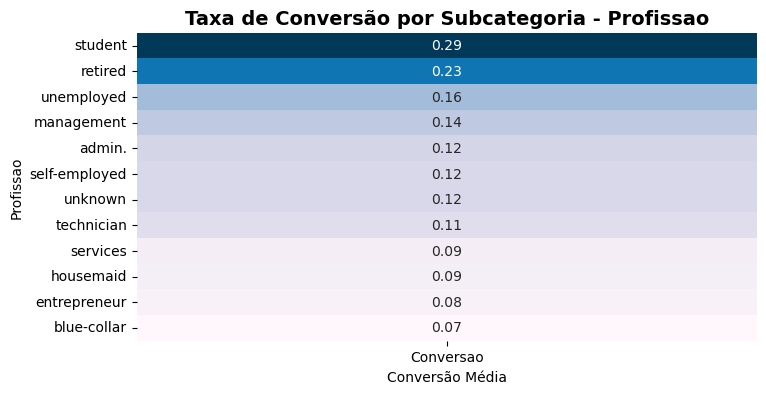

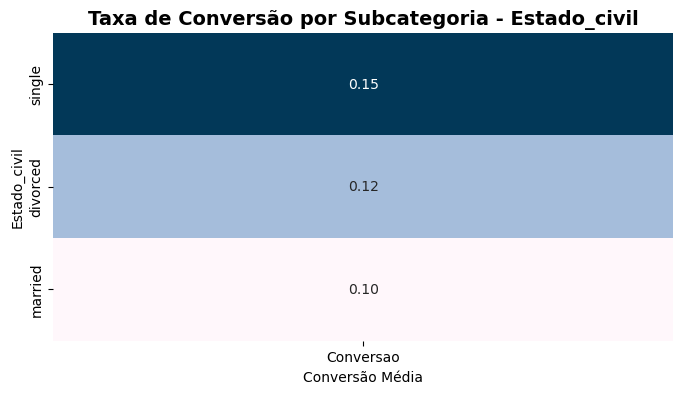

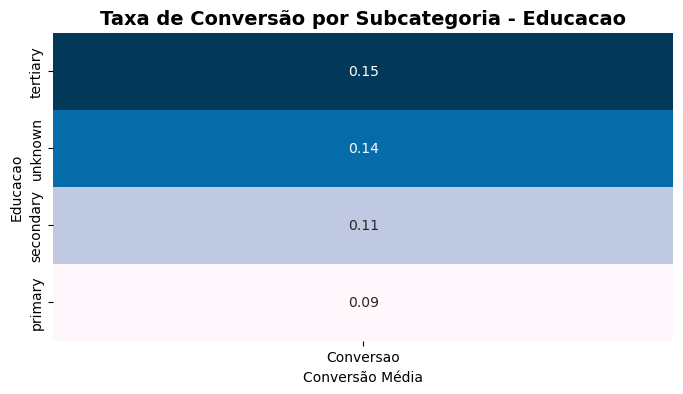

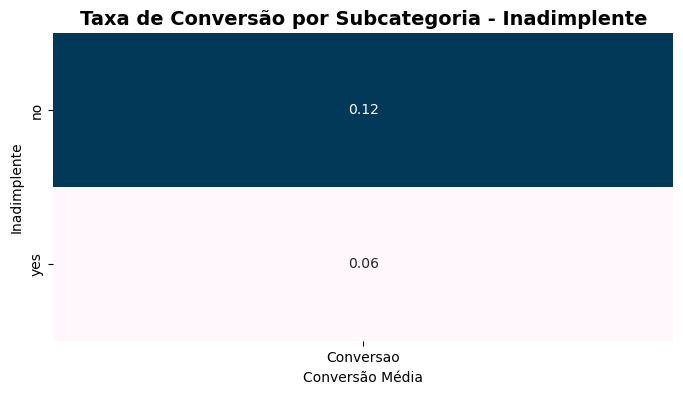

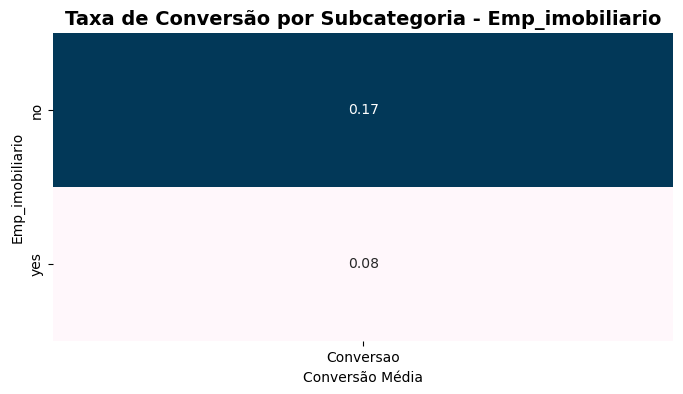

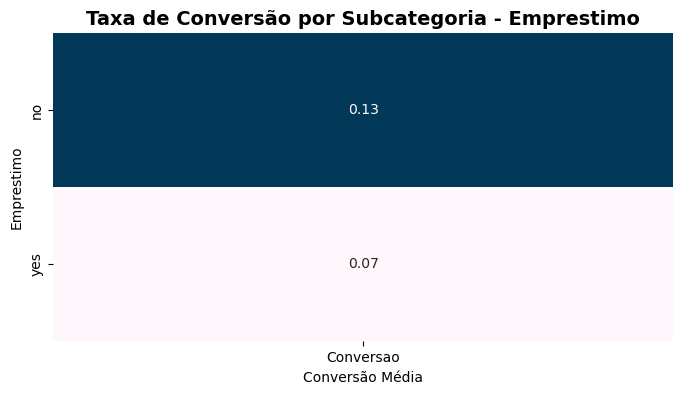

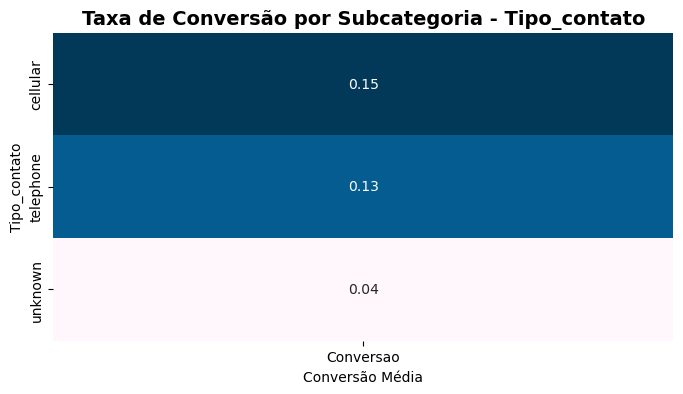

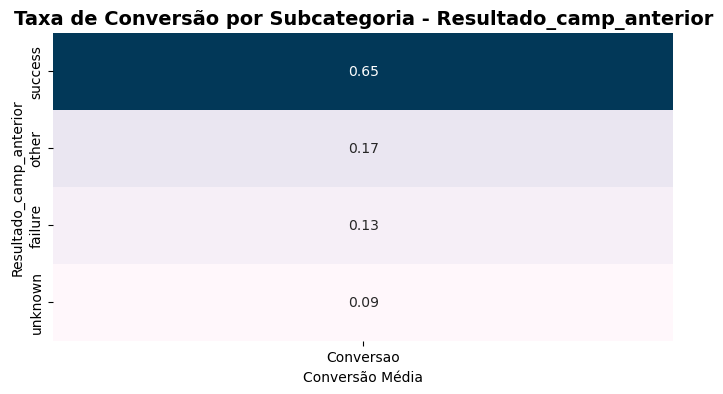

In [4]:
# Analisando as variáveis qualitativas
qualitativas = ['Profissao', 'Estado_civil', 'Educacao', 'Inadimplente', 'Emp_imobiliario', 'Emprestimo', 'Tipo_contato', 'Resultado_camp_anterior']
quali_dic = {}
for i in qualitativas:
    quali_dic[i] = df.groupby(i)['Conversao'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    sns.heatmap(quali_dic[i].to_frame(), annot=True, cmap='PuBu', fmt=".2f", cbar=False)
    plt.title(f'Taxa de Conversão por Subcategoria - {i}', fontsize=14, fontweight='bold')
    plt.xlabel('Conversão Média')
    plt.ylabel(i)
    plt.show()

### Verificando correlação das variáveis Mes e Dia

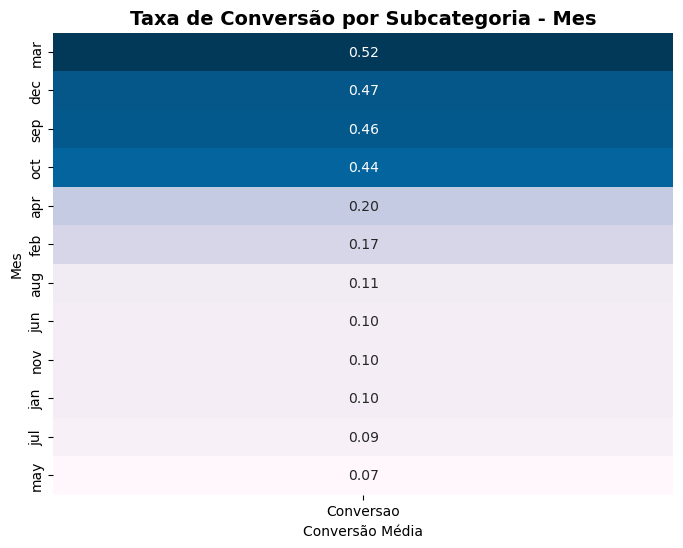

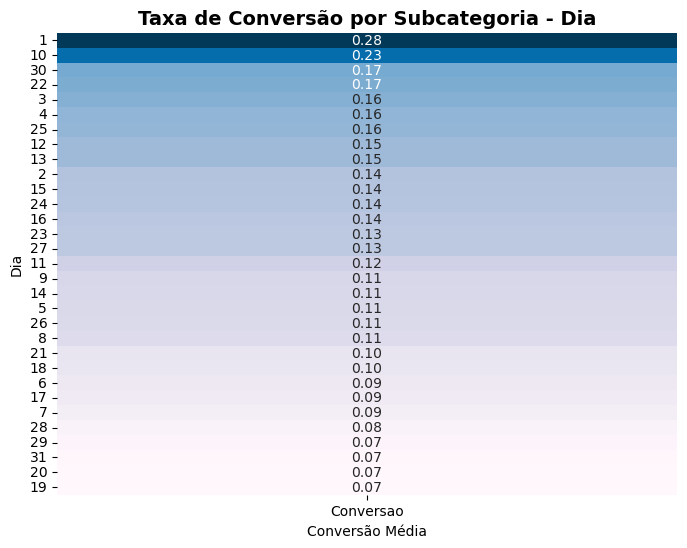

In [5]:
# Analisando 'Mes' e 'Dia' em relação à conversão
quali_dic['Mes'] = df.groupby('Mes')['Conversao'].mean().sort_values(ascending=False)
quali_dic['Dia'] = df.groupby('Dia')['Conversao'].mean().sort_values(ascending=False)

for var in ['Mes', 'Dia']:
    plt.figure(figsize=(8, 6))
    sns.heatmap(quali_dic[var].to_frame(), annot=True, cmap='PuBu', fmt=".2f", cbar=False)
    plt.title(f'Taxa de Conversão por Subcategoria - {var}', fontsize=14, fontweight='bold')
    plt.xlabel('Conversão Média')
    plt.ylabel(var)
    plt.show()

### Excluindo variáveis dispensaveis

In [6]:
df = df.drop(columns=['Idade', 'Profissao', 'Estado_civil', 'Educacao', 'Inadimplente',
       'Saldo_medio', 'Emp_imobiliario', 'Emprestimo', 'Tipo_contato', 'Dia',
        'Contatos_realizados', 'Dias_passados_camp_anterior', 'Contatos_camp_anterior'])

### Análise da variavel DURACAO

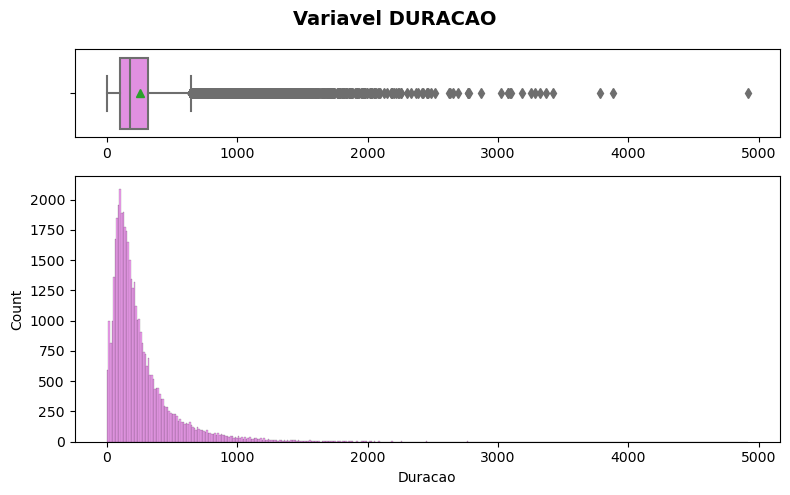

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Converter o nome da série em maiúsculas
nome = df['Duracao'].name.upper()

# Criar as figuras e os eixos
fig, (ax_box, ax_dis) = plt.subplots(
    2, 1, 
    gridspec_kw={"height_ratios": (.25, .75)}, 
    figsize=(8, 5)
)

# Configurar o título
fig.suptitle(f"Variavel {nome}", fontsize=14, fontweight='bold')

# Configurando graficos
sns.boxplot(x=df['Duracao'], showmeans=True, orient='h', color="violet", ax=ax_box)
ax_box.set(xlabel='')
sns.histplot(df['Duracao'], kde=False, color='violet', ax=ax_dis)

# Plotando graficos
plt.tight_layout()
plt.show()

### Análise da variavel RESULTADO_CAMP_ANTERIOR

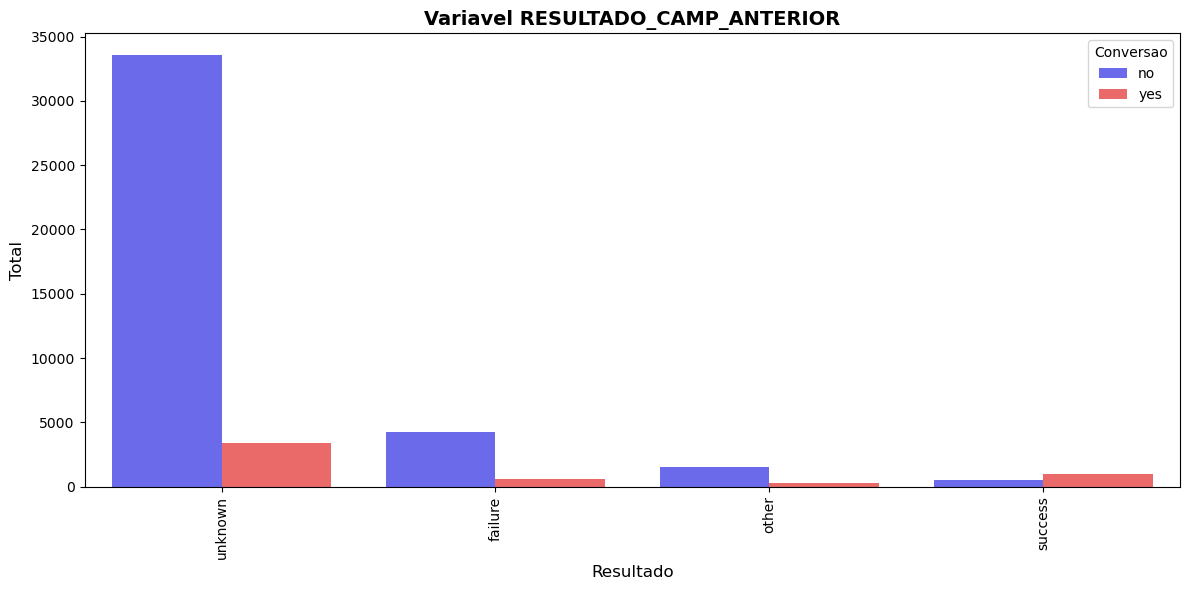

In [8]:
# Converter o nome da série em maiúsculas
nome = df['Resultado_camp_anterior'].name.upper()

# Obter as contagens e criar uma ordem personalizada
ordem = df_original['Resultado_camp_anterior'].value_counts().index

# Plotar o gráfico com a ordem baseada na contagem
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='Resultado_camp_anterior', hue="Conversao", order=ordem, palette='seismic')
plt.xticks(rotation=90)
plt.title(f"Variavel {nome}", fontsize=14, fontweight='bold')
plt.xlabel("Resultado", fontsize=12)
plt.ylabel("Total", fontsize=12)
plt.tight_layout()
plt.show()

### Análise da variavel Mes

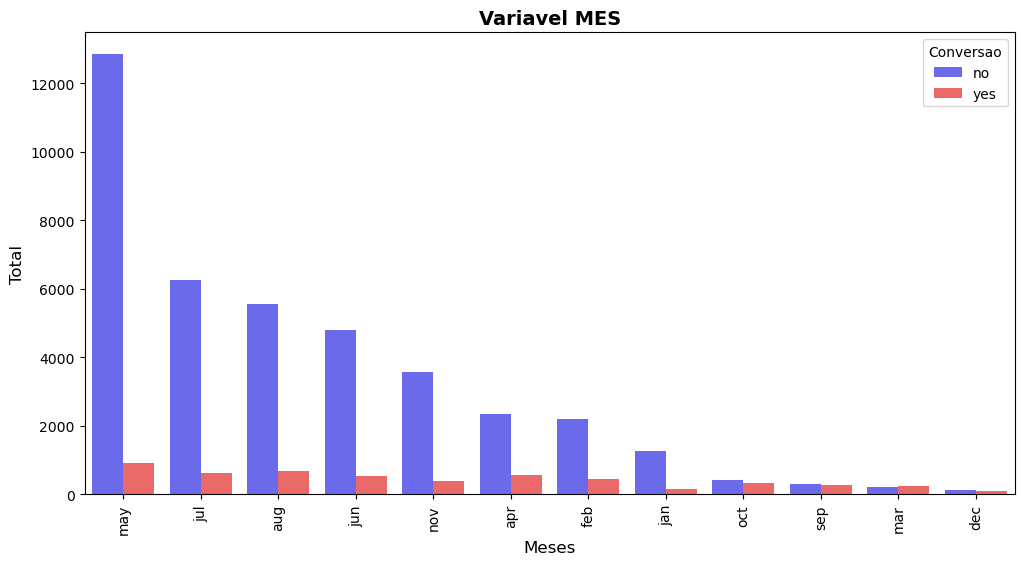

In [9]:
# Converter o nome da série em maiúsculas
nome = df_original['Mes'].name.upper()

# Obter as contagens e criar uma ordem personalizada
ordem = df_original['Mes'].value_counts().index

# Plotar o gráfico com a ordem baseada na contagem
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='Mes', hue="Conversao", order=ordem, palette='seismic')
plt.xticks(rotation=90)
plt.title(f"Variavel {nome}", fontsize=14, fontweight='bold')
plt.xlabel("Meses", fontsize=12)
plt.ylabel("Total", fontsize=12)
plt.tight_layout()
plt.show()

### Visualizando distribuicao da variavel CONVERSAO

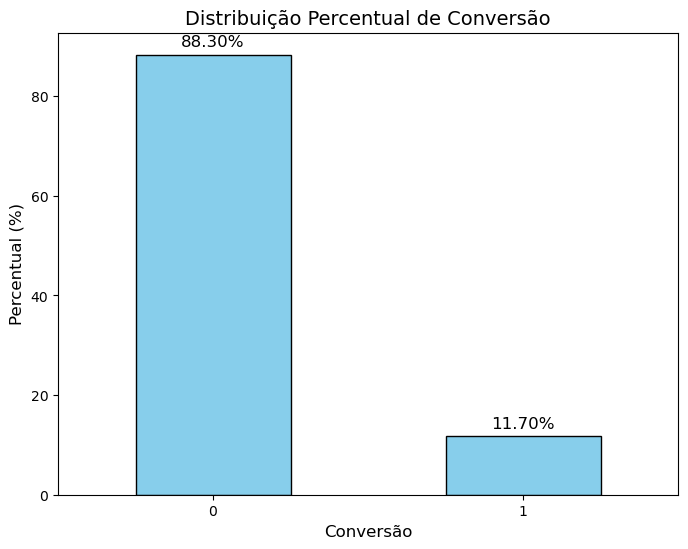

In [10]:
import matplotlib.pyplot as plt

# Calculando a distribuição percentual
percentual = df['Conversao'].value_counts(normalize=True) * 100

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = percentual.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando título e rótulos
plt.title('Distribuição Percentual de Conversão', fontsize=14)
plt.xlabel('Conversão', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)

# Adicionando os rótulos em cima das barras
for i, v in enumerate(percentual):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)

# Exibindo o gráfico
plt.xticks(rotation=0)  # Ajusta a rotação dos rótulos do eixo X
plt.show()

### Pré processamento dos dados

In [11]:
# Pré processamento
from sklearn.preprocessing import OneHotEncoder

# Selecionando as variáveis
qualitativas = ['Resultado_camp_anterior', 'Mes']
conversao = df['Conversao']
duracao = df['Duracao']

# Separando variáveis categóricas e aplicando OneHotEncoding
encoder = OneHotEncoder( sparse_output=False)
dados = encoder.fit_transform(df[qualitativas])
colunas = encoder.get_feature_names_out(qualitativas)

# Criando DataFrame para as variáveis codificadas
df_quali = pd.DataFrame(dados, columns=colunas, index=df.index)
df = pd.concat([duracao, df_quali, conversao], axis=1)

### Balanceando os dados

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Aplicando o SMOTE
X = df.drop('Conversao', axis=1)
y = df['Conversao']
smote = SMOTE(random_state=42)
X2, y2 = smote.fit_resample(X, y)
df = pd.concat([X2, y2], axis=1)

### Treinando o modelo com Árvore de Decisão

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Selecionando as variáveis independentes e a variável dependente
X = df.drop('Conversao', axis=1)
y = df['Conversao']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo o modelo de regressão logística
modelo = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Verificando o resultado + taxa de overfitting

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando as métricas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Fazendo previsões para calcular Overfitting
y_verif = modelo.predict(X_train)
a = accuracy_score(y_train, y_verif)
p = precision_score(y_train, y_verif)
r = recall_score(y_train, y_verif)
f = f1_score(y_train, y_verif)

# Calculando a taxa de Overfitting
a_over = (a - acuracia) / a
p_over = (p - precisao) / p
r_over = (r - recall) / r
f_over = (f - f1) / f

# Criando uma tabela com todas as métricas
previsao = pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [acuracia, precisao, recall, f1],
    "Overfitting": [a_over, p_over, r_over, f_over]
})

# Arredondando as casas decimais
previsao['Valor'] = previsao['Valor'].round(2)
previsao['Overfitting'] = previsao['Overfitting'].round(3)
previsao

,Métrica,Valor,Overfitting
0,Acurácia,0.92,0.049
1,Precisão,0.92,0.051
2,Recall,0.91,0.047
3,F1-Score,0.92,0.049


### Resultado + K-fold

In [15]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Configurando o K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas para avaliação
metricas = {
    'Acurácia': make_scorer(accuracy_score),
    'Precisão': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-Score': make_scorer(f1_score)
}

# Avaliando o modelo para cada métrica
resultados = {}
for nome_metrica, s in metricas.items():
    sc = cross_val_score(modelo, X, y, cv=kf, scoring=s)
    resultados[nome_metrica] = {
        'Valor': round(np.mean(sc), 2),
        'Desvio': round(np.std(sc), 3)
    }

# Exibindo os resultados
df_resultados = pd.DataFrame(resultados).T
df_resultados

,Valor,Desvio
Acurácia,0.92,0.002
Precisão,0.92,0.001
Recall,0.91,0.003
F1-Score,0.92,0.002


### Tabela de confusão

In [16]:
from sklearn.metrics import confusion_matrix

# Gerando a matriz de confusão
confusao = confusion_matrix(y_test, y_pred)
tabela = pd.DataFrame(
    confusao, 
    index=["No", "Yes"], 
    columns=["Previsto: No", "Previsto: Yes"]
)
tabela

,Previsto: No,Previsto: Yes
No,11060,913
Yes,1078,10903
